In [113]:
import pickle, random
import pandas as pd
from scipy import spatial
import PIL.Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.linewidth'] = 3

In [114]:
with open("../artefacts/valid_fvs.pkl", "rb") as f:
    data = pickle.load(f)
    f.close()

In [115]:
queries = list(data.keys())
images_data_path = "/home/vinayak/AnimeFaceDataset"

In [116]:
def get_topK(query, gallery, K = 5):
    '''
    Given a query image and an inventory/gallery set to compare it with, 
    does a nearest neighbour computation and returns topK neighbours
    '''
    
    assert query in data, "Query Image not found"
    qry_fv = data[query]
    
    gallery_distances = {}
    
    # Compute cosine similarity based topK nearest neighbour search
    for gall in gallery:
        gall_fv = data[gall]
        gallery_distances[gall] = 1 - spatial.distance.cosine(qry_fv, gall_fv)
    
    topK = sorted(gallery_distances, key = lambda x: gallery_distances[x], reverse = True)[:K]
    topK_distances = [gallery_distances[x] for x in topK]
    
    return (topK, topK_distances)

In [117]:
def color_axis(ax, color):
    for orientation in ['bottom', 'top', 'right', 'left']:
        ax.spines[orientation].set_color(color)

In [118]:
def plot_result(query, gallery, axes):
    
    inames = [query] + gallery
    images = [PIL.Image.open(f'{images_data_path}/{x}').resize((225,225)) for x in inames]
    
    for idx, (g, a) in enumerate(zip(images, axes)):
        a.imshow(g)
        a.set_title(inames[idx].split('/')[-1])
        a.set_xticks([])
        a.set_yticks([])
        
        if idx == 0: color_axis(a, 'black')
        elif query.split('/')[0] == inames[idx].split('/')[0]: color_axis(a, 'green')
        else: color_axis(a, 'red')

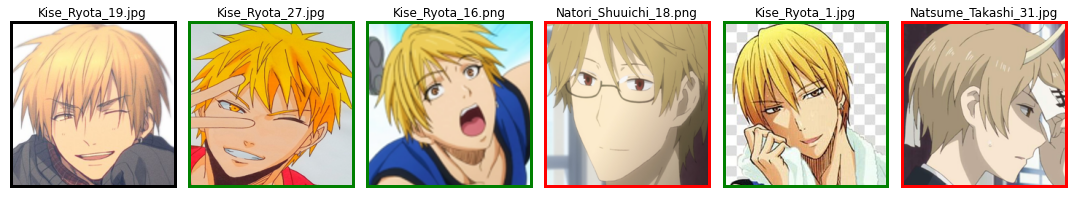

In [120]:
# Sample a random query image and create a gallery set by subtracting that image
qry = random.sample(queries, 1)[0]
gallery = [x for x in queries if x != qry]
topK = get_topK(qry, gallery)

# Plot the results using the function defined above
fig, ax = plt.subplots(1, 6, figsize = (15, 10))
plot_result(qry, topK[0], ax)
fig.tight_layout();